In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
# Import the input dataset
tracks_path = 'Resources/spotify.csv'
tracks_df = pd.read_csv(tracks_path)
tracks_df.head()

,track_id,track_name,artists_name,artist_id,genres,release_date,track_popularity,duration_ms,explicit,key,...,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0004Uy71ku11n3LMpuyf59,24.11.94 - Wersja Akustyczna,['Golden Life'],3NyQ2NjqMjDtVSiEkXFW2r,['polish rock'],2012-01-01,34,258907,0,6,...,0.623,0.599,-9.255,1.0,0.0255,0.1770,0.001480,0.0748,0.381,140.056
1,000CSYu4rvd8cQ7JilfxhZ,Adam et Ève,['Kaïn'],1KMHmX2PgvEl1nFzFmEdcZ,"['country quebecois', 'rock quebecois']",2005-05-03,43,189107,0,2,...,0.624,0.766,-7.860,1.0,0.0731,0.3450,0.000000,0.1130,0.548,95.128
2,000DsoWJKHdaUmhgcnpr8j,Balla Trazan Apansson / Vegetarianvisan,['Trazan & Banarne'],5PbCQPKjb0wQwaE7i5OVC6,['barnmusik'],1977-07-11,16,234533,0,7,...,0.572,0.608,-10.224,1.0,0.5550,0.6420,0.000220,0.3440,0.559,106.453
3,000G1xMMuwxNHmwVsBdtj1,Will Anything Happen,['Blondie'],4tpUmLEVLCGFr93o8hFFIB,"['candy pop', 'new wave', 'new wave pop', 'per...",1978-09-23,32,182347,0,2,...,0.256,0.895,-4.860,1.0,0.0707,0.0131,0.000106,0.0821,0.555,191.307
4,000KblXP5csWFFFsD6smOy,Podrás,['Tamara Castro'],11PnNvuse5a0xPupBIeHyW,"['chamame', 'folclore salteno', 'folklore arge...",2006-07-08,35,240013,0,4,...,0.619,0.518,-5.392,0.0,0.0534,0.8050,0.000000,0.1020,0.314,143.757


In [3]:
# Create a dataframe for dropped columns
categories_df = tracks_df[['track_id', 'track_name', 'artists_name', 'artist_id', 'release_date', 'genres']]

In [4]:
# Check the shape of dataframe
tracks_df.shape 

(625676, 24)

In [5]:
# Check the number of null values
tracks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625676 entries, 0 to 625675
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   track_id           625676 non-null  object 
 1   track_name         625676 non-null  object 
 2   artists_name       625676 non-null  object 
 3   artist_id          625676 non-null  object 
 4   genres             625676 non-null  object 
 5   release_date       625676 non-null  object 
 6   track_popularity   625676 non-null  int64  
 7   duration_ms        625676 non-null  int64  
 8   explicit           625676 non-null  int64  
 9   key                625676 non-null  int64  
 10  time_signature     625676 non-null  int64  
 11  followers          625676 non-null  int64  
 12  artist_popularity  625676 non-null  float64
 13  unique_playlists   625676 non-null  int64  
 14  danceability       625676 non-null  float64
 15  energy             625676 non-null  float64
 16  lo

In [6]:
# Find the number of duplicates in the dataframe
tracks_df.duplicated().sum

<bound method Series.sum of 0         False
1         False
2         False
3         False
4         False
          ...  
625671    False
625672    False
625673    False
625674    False
625675    False
Length: 625676, dtype: bool>

## Correlation Analysis

In [7]:
# Check the correlation of dataframe
tracks_df.corr(method='spearman')

,track_popularity,duration_ms,explicit,key,time_signature,followers,artist_popularity,unique_playlists,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
track_popularity,1.000000,0.143431,0.162259,0.014170,0.087755,0.408772,0.484866,0.034125,0.168590,0.277524,0.312059,-0.032220,-0.019092,-0.326676,-0.216396,-0.061937,0.006739,0.065853
duration_ms,0.143431,1.000000,-0.007445,0.009945,0.069134,0.171519,0.060815,0.051729,-0.099536,0.120988,0.099824,-0.051718,-0.170465,-0.188428,0.113267,-0.080677,-0.193873,0.035032
explicit,0.162259,-0.007445,1.000000,0.009489,0.057597,0.140293,0.156243,0.196435,0.166787,0.129304,0.165201,-0.055455,0.241129,-0.159660,-0.122981,-0.000856,-0.030961,0.005537
key,0.014170,0.009945,0.009489,1.000000,0.008297,0.008910,0.004344,-0.000769,0.017877,0.034690,0.026396,-0.128025,0.028354,-0.024897,-0.001136,-0.010360,0.021168,0.003711
time_signature,0.087755,0.069134,0.057597,0.008297,1.000000,0.042732,0.034129,0.041122,0.145564,0.200859,0.154611,-0.020508,0.009971,-0.187604,-0.016812,-0.025903,0.102527,0.014935
followers,0.408772,0.171519,0.140293,0.008910,0.042732,1.000000,0.893945,0.221156,-0.035106,0.156983,0.185578,-0.002259,-0.012435,-0.179645,-0.046051,-0.003082,-0.079803,0.021215
artist_popularity,0.484866,0.060815,0.156243,0.004344,0.034129,0.893945,1.000000,0.243595,0.040085,0.166836,0.178918,0.000496,0.040314,-0.210517,-0.112911,0.019444,-0.066255,0.014783
unique_playlists,0.034125,0.051729,0.196435,-0.000769,0.041122,0.221156,0.243595,1.000000,0.035363,0.136758,0.201156,0.011000,0.035357,-0.195170,-0.052686,-0.024460,-0.084953,0.037224
danceability,0.168590,-0.099536,0.166787,0.017877,0.145564,-0.035106,0.040085,0.035363,1.000000,0.204627,0.188017,-0.051048,0.235929,-0.190073,-0.217672,-0.126320,0.498277,-0.037929
energy,0.277524,0.120988,0.129304,0.034690,0.200859,0.156983,0.166836,0.136758,0.204627,1.000000,0.774676,-0.064533,0.181076,-0.720625,-0.126624,0.083079,0.341968,0.234726


<AxesSubplot:>

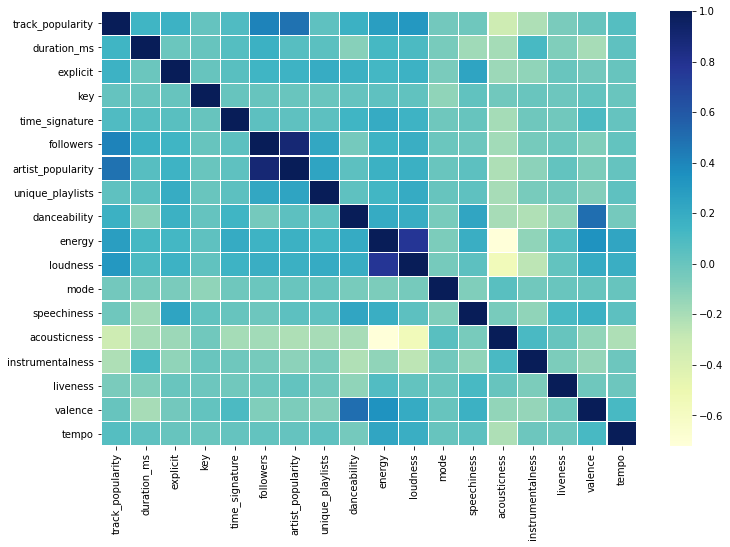

In [8]:
# Import the library
from scipy.stats import norm

# Create Correlation Matrix
corrmat = tracks_df.corr(method='spearman')
  
f, ax = plt.subplots(figsize =(12, 8))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

In [9]:
# Create Grid Correlation Matrix
# corrmat = tracks_df.corr()
  
# Corr_mat = sns.clustermap(corrmat, cmap ="YlGnBu", linewidths = 0.1);
# plt.setp(Corr_mat.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0)
  
# Corr_mat

In [10]:
# Check the statistics of the target
tracks_df['track_popularity'].describe()

count    625676.000000
mean         27.314898
std          18.436140
min           0.000000
25%          12.000000
50%          27.000000
75%          41.000000
max         100.000000
Name: track_popularity, dtype: float64

<AxesSubplot:ylabel='Frequency'>

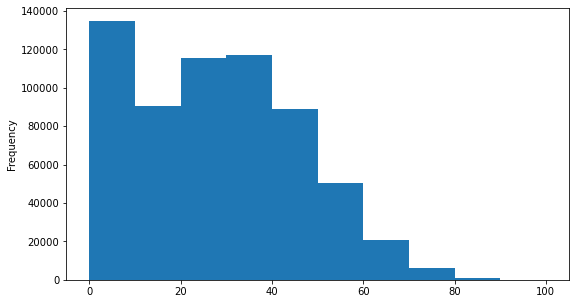

In [11]:
# Create the target histogram
plt.figure(figsize = (9, 5))
tracks_df['track_popularity'].plot(kind ="hist")

<AxesSubplot:>

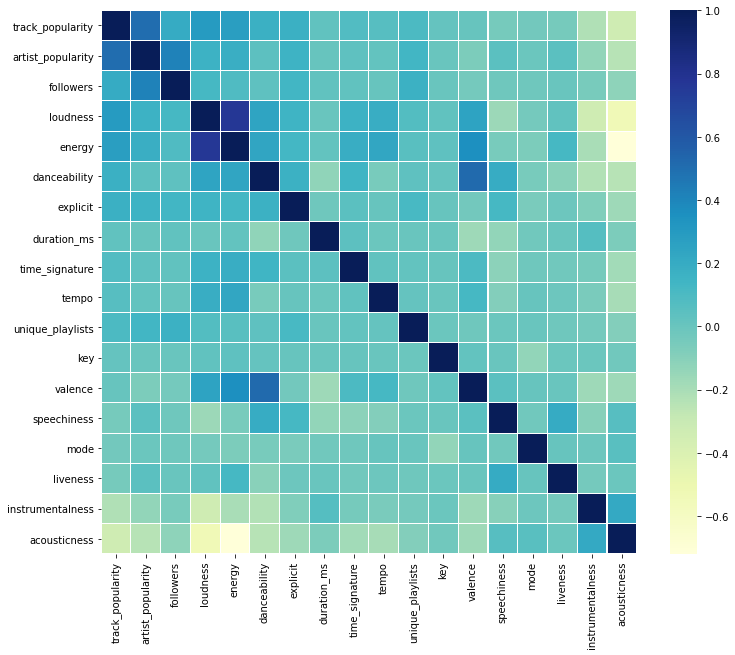

In [12]:
# track_popularity correlation matrix
# k : number of features for heatmap
k = 24 
  
cols = corrmat.nlargest(k, 'track_popularity')['track_popularity'].index
  
cm = np.corrcoef(tracks_df[cols].values.T)
f, ax = plt.subplots(figsize =(12, 10))
  
sns.heatmap(cm, ax = ax, cmap ="YlGnBu", 
            linewidths = 0.1, yticklabels = cols.values, 
                              xticklabels = cols.values)

In [13]:
# Generate our categorical variable lists
tracks_cat = tracks_df.dtypes[tracks_df.dtypes == "object"].index.tolist()

In [14]:
# Check the number of unique values in each column
tracks_df[tracks_cat].nunique()

track_id        625676
track_name      467936
artists_name    119246
artist_id       110621
genres           22244
release_date     19267
dtype: int64

In [15]:
# Count the number of unique artists
artists = np.unique(tracks_df["artists_name"])
print("Artists: ", artists)
print("No of unique artists in the list are:", len(artists))

Artists:  [' "Anita O\'Day"' ' "Ar\'mon & Trey"' ' "Ash O\'Connor"' ... "['장정우']"
 "['지선']" "['최진희']"]
No of unique artists in the list are: 119246


In [16]:
# Check the value counts of the artists
artists_count = tracks_df['artists_name'].value_counts()
print(artists_count)

['Die drei ???']           3856
['TKKG Retro-Archiv']      2006
['Benjamin Blümchen']      1503
['Bibi Blocksberg']        1472
['Lata Mangeshkar']        1373
                           ... 
["Mo'vez Lang", 'Mala']       1
['Aria', 'Alisia']            1
['Majk Spirit', 'Supa']       1
['Chamillionaire']            1
['Terttu Anneli']             1
Name: artists_name, Length: 119246, dtype: int64


<AxesSubplot:>

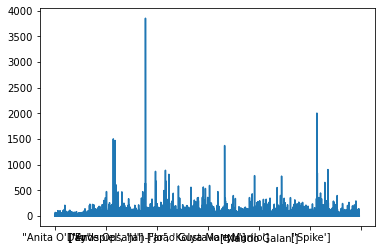

In [17]:
# Visualize the value counts of artists
# artists_count.plot.density()
tracks_df.artists_name.value_counts().sort_index().plot()

In [18]:
# Create the variable song_artists to determine the frequency of each artist
# Convert to dictionary
artists_dic = artists_count.to_dict() 
tracks_df['artist_frequency'] = tracks_df['artists_name'].map(artists_dic) 
tracks_df.head()

,track_id,track_name,artists_name,artist_id,genres,release_date,track_popularity,duration_ms,explicit,key,...,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist_frequency
0,0004Uy71ku11n3LMpuyf59,24.11.94 - Wersja Akustyczna,['Golden Life'],3NyQ2NjqMjDtVSiEkXFW2r,['polish rock'],2012-01-01,34,258907,0,6,...,0.599,-9.255,1.0,0.0255,0.1770,0.001480,0.0748,0.381,140.056,2
1,000CSYu4rvd8cQ7JilfxhZ,Adam et Ève,['Kaïn'],1KMHmX2PgvEl1nFzFmEdcZ,"['country quebecois', 'rock quebecois']",2005-05-03,43,189107,0,2,...,0.766,-7.860,1.0,0.0731,0.3450,0.000000,0.1130,0.548,95.128,7
2,000DsoWJKHdaUmhgcnpr8j,Balla Trazan Apansson / Vegetarianvisan,['Trazan & Banarne'],5PbCQPKjb0wQwaE7i5OVC6,['barnmusik'],1977-07-11,16,234533,0,7,...,0.608,-10.224,1.0,0.5550,0.6420,0.000220,0.3440,0.559,106.453,34
3,000G1xMMuwxNHmwVsBdtj1,Will Anything Happen,['Blondie'],4tpUmLEVLCGFr93o8hFFIB,"['candy pop', 'new wave', 'new wave pop', 'per...",1978-09-23,32,182347,0,2,...,0.895,-4.860,1.0,0.0707,0.0131,0.000106,0.0821,0.555,191.307,118
4,000KblXP5csWFFFsD6smOy,Podrás,['Tamara Castro'],11PnNvuse5a0xPupBIeHyW,"['chamame', 'folclore salteno', 'folklore arge...",2006-07-08,35,240013,0,4,...,0.518,-5.392,0.0,0.0534,0.8050,0.000000,0.1020,0.314,143.757,7


In [19]:
# Drop the "artists" column
tracks_df = tracks_df.drop(['artists_name'], axis='columns')
tracks_df.head()

,track_id,track_name,artist_id,genres,release_date,track_popularity,duration_ms,explicit,key,time_signature,...,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist_frequency
0,0004Uy71ku11n3LMpuyf59,24.11.94 - Wersja Akustyczna,3NyQ2NjqMjDtVSiEkXFW2r,['polish rock'],2012-01-01,34,258907,0,6,4,...,0.599,-9.255,1.0,0.0255,0.1770,0.001480,0.0748,0.381,140.056,2
1,000CSYu4rvd8cQ7JilfxhZ,Adam et Ève,1KMHmX2PgvEl1nFzFmEdcZ,"['country quebecois', 'rock quebecois']",2005-05-03,43,189107,0,2,4,...,0.766,-7.860,1.0,0.0731,0.3450,0.000000,0.1130,0.548,95.128,7
2,000DsoWJKHdaUmhgcnpr8j,Balla Trazan Apansson / Vegetarianvisan,5PbCQPKjb0wQwaE7i5OVC6,['barnmusik'],1977-07-11,16,234533,0,7,4,...,0.608,-10.224,1.0,0.5550,0.6420,0.000220,0.3440,0.559,106.453,34
3,000G1xMMuwxNHmwVsBdtj1,Will Anything Happen,4tpUmLEVLCGFr93o8hFFIB,"['candy pop', 'new wave', 'new wave pop', 'per...",1978-09-23,32,182347,0,2,4,...,0.895,-4.860,1.0,0.0707,0.0131,0.000106,0.0821,0.555,191.307,118
4,000KblXP5csWFFFsD6smOy,Podrás,11PnNvuse5a0xPupBIeHyW,"['chamame', 'folclore salteno', 'folklore arge...",2006-07-08,35,240013,0,4,3,...,0.518,-5.392,0.0,0.0534,0.8050,0.000000,0.1020,0.314,143.757,7


In [20]:
# Working with the release_date

In [21]:
# Check the data type
tracks_df.dtypes

track_id              object
track_name            object
artist_id             object
genres                object
release_date          object
track_popularity       int64
duration_ms            int64
explicit               int64
key                    int64
time_signature         int64
followers              int64
artist_popularity    float64
unique_playlists       int64
danceability         float64
energy               float64
loudness             float64
mode                 float64
speechiness          float64
acousticness         float64
instrumentalness     float64
liveness             float64
valence              float64
tempo                float64
artist_frequency       int64
dtype: object

In [22]:
# Convert the Time column to datatime format
tracks_df['release_date'] = pd.to_datetime(tracks_df.release_date)
tracks_df.head()

,track_id,track_name,artist_id,genres,release_date,track_popularity,duration_ms,explicit,key,time_signature,...,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist_frequency
0,0004Uy71ku11n3LMpuyf59,24.11.94 - Wersja Akustyczna,3NyQ2NjqMjDtVSiEkXFW2r,['polish rock'],2012-01-01,34,258907,0,6,4,...,0.599,-9.255,1.0,0.0255,0.1770,0.001480,0.0748,0.381,140.056,2
1,000CSYu4rvd8cQ7JilfxhZ,Adam et Ève,1KMHmX2PgvEl1nFzFmEdcZ,"['country quebecois', 'rock quebecois']",2005-05-03,43,189107,0,2,4,...,0.766,-7.860,1.0,0.0731,0.3450,0.000000,0.1130,0.548,95.128,7
2,000DsoWJKHdaUmhgcnpr8j,Balla Trazan Apansson / Vegetarianvisan,5PbCQPKjb0wQwaE7i5OVC6,['barnmusik'],1977-07-11,16,234533,0,7,4,...,0.608,-10.224,1.0,0.5550,0.6420,0.000220,0.3440,0.559,106.453,34
3,000G1xMMuwxNHmwVsBdtj1,Will Anything Happen,4tpUmLEVLCGFr93o8hFFIB,"['candy pop', 'new wave', 'new wave pop', 'per...",1978-09-23,32,182347,0,2,4,...,0.895,-4.860,1.0,0.0707,0.0131,0.000106,0.0821,0.555,191.307,118
4,000KblXP5csWFFFsD6smOy,Podrás,11PnNvuse5a0xPupBIeHyW,"['chamame', 'folclore salteno', 'folklore arge...",2006-07-08,35,240013,0,4,3,...,0.518,-5.392,0.0,0.0534,0.8050,0.000000,0.1020,0.314,143.757,7


In [23]:
# Check the release_date type for datetime
tracks_df.dtypes

track_id                     object
track_name                   object
artist_id                    object
genres                       object
release_date         datetime64[ns]
track_popularity              int64
duration_ms                   int64
explicit                      int64
key                           int64
time_signature                int64
followers                     int64
artist_popularity           float64
unique_playlists              int64
danceability                float64
energy                      float64
loudness                    float64
mode                        float64
speechiness                 float64
acousticness                float64
instrumentalness            float64
liveness                    float64
valence                     float64
tempo                       float64
artist_frequency              int64
dtype: object

In [24]:
# Determine the release_date weekday, Sunday=0, Monday=1,... 
tracks_df.release_date.dt.weekday.head()

0    6
1    1
2    0
3    5
4    5
Name: release_date, dtype: int64

In [25]:
# Determine the day of year
tracks_df.release_date.dt.dayofyear.head()

0      1
1    123
2    192
3    266
4    189
Name: release_date, dtype: int64

In [26]:
# Determine the earliest and latest release_date-timestamps
print(f"The realiest release: {tracks_df.release_date.min()}, The latest release: {tracks_df.release_date.max()}")

The realiest release: 1900-01-01 00:00:00, The latest release: 2021-04-16 00:00:00


In [27]:
# Count the number of days
(tracks_df.release_date.max()-tracks_df.release_date.min()).days

44300

In [28]:
# Plotting
%matplotlib inline

In [29]:
# Assign a Year column instead of release_date, 
tracks_df['Year'] = tracks_df.release_date.dt.year
tracks_df.head()

,track_id,track_name,artist_id,genres,release_date,track_popularity,duration_ms,explicit,key,time_signature,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist_frequency,Year
0,0004Uy71ku11n3LMpuyf59,24.11.94 - Wersja Akustyczna,3NyQ2NjqMjDtVSiEkXFW2r,['polish rock'],2012-01-01,34,258907,0,6,4,...,-9.255,1.0,0.0255,0.1770,0.001480,0.0748,0.381,140.056,2,2012
1,000CSYu4rvd8cQ7JilfxhZ,Adam et Ève,1KMHmX2PgvEl1nFzFmEdcZ,"['country quebecois', 'rock quebecois']",2005-05-03,43,189107,0,2,4,...,-7.860,1.0,0.0731,0.3450,0.000000,0.1130,0.548,95.128,7,2005
2,000DsoWJKHdaUmhgcnpr8j,Balla Trazan Apansson / Vegetarianvisan,5PbCQPKjb0wQwaE7i5OVC6,['barnmusik'],1977-07-11,16,234533,0,7,4,...,-10.224,1.0,0.5550,0.6420,0.000220,0.3440,0.559,106.453,34,1977
3,000G1xMMuwxNHmwVsBdtj1,Will Anything Happen,4tpUmLEVLCGFr93o8hFFIB,"['candy pop', 'new wave', 'new wave pop', 'per...",1978-09-23,32,182347,0,2,4,...,-4.860,1.0,0.0707,0.0131,0.000106,0.0821,0.555,191.307,118,1978
4,000KblXP5csWFFFsD6smOy,Podrás,11PnNvuse5a0xPupBIeHyW,"['chamame', 'folclore salteno', 'folklore arge...",2006-07-08,35,240013,0,4,3,...,-5.392,0.0,0.0534,0.8050,0.000000,0.1020,0.314,143.757,7,2006


<AxesSubplot:>

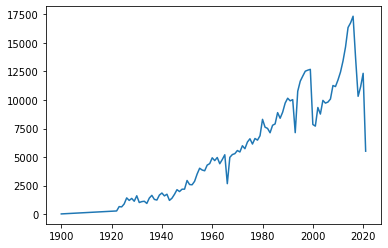

In [30]:
# Plot the value_counts of year feature 
tracks_df.Year.value_counts().sort_index().plot()

In [31]:
# Check the number of null values
tracks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625676 entries, 0 to 625675
Data columns (total 25 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   track_id           625676 non-null  object        
 1   track_name         625676 non-null  object        
 2   artist_id          625676 non-null  object        
 3   genres             625676 non-null  object        
 4   release_date       625676 non-null  datetime64[ns]
 5   track_popularity   625676 non-null  int64         
 6   duration_ms        625676 non-null  int64         
 7   explicit           625676 non-null  int64         
 8   key                625676 non-null  int64         
 9   time_signature     625676 non-null  int64         
 10  followers          625676 non-null  int64         
 11  artist_popularity  625676 non-null  float64       
 12  unique_playlists   625676 non-null  int64         
 13  danceability       625676 non-null  float64 

In [32]:
# Drop the release_date 
tracks_df = tracks_df.drop(['release_date'], axis='columns')
tracks_df.head()

,track_id,track_name,artist_id,genres,track_popularity,duration_ms,explicit,key,time_signature,followers,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist_frequency,Year
0,0004Uy71ku11n3LMpuyf59,24.11.94 - Wersja Akustyczna,3NyQ2NjqMjDtVSiEkXFW2r,['polish rock'],34,258907,0,6,4,5425,...,-9.255,1.0,0.0255,0.1770,0.001480,0.0748,0.381,140.056,2,2012
1,000CSYu4rvd8cQ7JilfxhZ,Adam et Ève,1KMHmX2PgvEl1nFzFmEdcZ,"['country quebecois', 'rock quebecois']",43,189107,0,2,4,30176,...,-7.860,1.0,0.0731,0.3450,0.000000,0.1130,0.548,95.128,7,2005
2,000DsoWJKHdaUmhgcnpr8j,Balla Trazan Apansson / Vegetarianvisan,5PbCQPKjb0wQwaE7i5OVC6,['barnmusik'],16,234533,0,7,4,8623,...,-10.224,1.0,0.5550,0.6420,0.000220,0.3440,0.559,106.453,34,1977
3,000G1xMMuwxNHmwVsBdtj1,Will Anything Happen,4tpUmLEVLCGFr93o8hFFIB,"['candy pop', 'new wave', 'new wave pop', 'per...",32,182347,0,2,4,914213,...,-4.860,1.0,0.0707,0.0131,0.000106,0.0821,0.555,191.307,118,1978
4,000KblXP5csWFFFsD6smOy,Podrás,11PnNvuse5a0xPupBIeHyW,"['chamame', 'folclore salteno', 'folklore arge...",35,240013,0,4,3,26380,...,-5.392,0.0,0.0534,0.8050,0.000000,0.1020,0.314,143.757,7,2006


In [33]:
# Drop the "id", "name" and "id_artists"
tracks_df = tracks_df.drop(['track_id', 'track_name', 'artist_id'], axis='columns')
tracks_df.head()

,genres,track_popularity,duration_ms,explicit,key,time_signature,followers,artist_popularity,unique_playlists,danceability,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist_frequency,Year
0,['polish rock'],34,258907,0,6,4,5425,36.0,0,0.623,...,-9.255,1.0,0.0255,0.1770,0.001480,0.0748,0.381,140.056,2,2012
1,"['country quebecois', 'rock quebecois']",43,189107,0,2,4,30176,48.0,0,0.624,...,-7.860,1.0,0.0731,0.3450,0.000000,0.1130,0.548,95.128,7,2005
2,['barnmusik'],16,234533,0,7,4,8623,38.0,0,0.572,...,-10.224,1.0,0.5550,0.6420,0.000220,0.3440,0.559,106.453,34,1977
3,"['candy pop', 'new wave', 'new wave pop', 'per...",32,182347,0,2,4,914213,73.0,0,0.256,...,-4.860,1.0,0.0707,0.0131,0.000106,0.0821,0.555,191.307,118,1978
4,"['chamame', 'folclore salteno', 'folklore arge...",35,240013,0,4,3,26380,44.0,0,0.619,...,-5.392,0.0,0.0534,0.8050,0.000000,0.1020,0.314,143.757,7,2006


In [34]:
# Check the data type
tracks_df.dtypes

genres                object
track_popularity       int64
duration_ms            int64
explicit               int64
key                    int64
time_signature         int64
followers              int64
artist_popularity    float64
unique_playlists       int64
danceability         float64
energy               float64
loudness             float64
mode                 float64
speechiness          float64
acousticness         float64
instrumentalness     float64
liveness             float64
valence              float64
tempo                float64
artist_frequency       int64
Year                   int64
dtype: object

In [35]:
# Check the number of null values
tracks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625676 entries, 0 to 625675
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   genres             625676 non-null  object 
 1   track_popularity   625676 non-null  int64  
 2   duration_ms        625676 non-null  int64  
 3   explicit           625676 non-null  int64  
 4   key                625676 non-null  int64  
 5   time_signature     625676 non-null  int64  
 6   followers          625676 non-null  int64  
 7   artist_popularity  625676 non-null  float64
 8   unique_playlists   625676 non-null  int64  
 9   danceability       625676 non-null  float64
 10  energy             625676 non-null  float64
 11  loudness           625676 non-null  float64
 12  mode               625676 non-null  float64
 13  speechiness        625676 non-null  float64
 14  acousticness       625676 non-null  float64
 15  instrumentalness   625676 non-null  float64
 16  li

In [36]:
# Check the statistics of dataframe
tracks_df.describe()

,track_popularity,duration_ms,explicit,key,time_signature,followers,artist_popularity,unique_playlists,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist_frequency,Year
count,625676.000000,6.256760e+05,625676.000000,625676.000000,625676.000000,6.256760e+05,625676.000000,625676.000000,625676.000000,625676.000000,625676.000000,625676.000000,625676.000000,625676.000000,625676.000000,625676.000000,625676.000000,625676.000000,625676.000000,625676.000000
mean,27.314898,2.299488e+05,0.055933,5.218930,3.877633,1.403637e+06,50.943887,0.441022,0.564538,0.550387,-9.960968,0.660466,0.104209,0.434300,0.107043,0.213278,0.545839,118.723330,105.497734,1990.060932
std,18.436140,1.186596e+05,0.229793,3.523761,0.464754,4.888986e+06,19.681475,3.681682,0.165382,0.251090,5.048856,0.473551,0.175805,0.348783,0.259290,0.183652,0.256901,29.712976,358.513394,22.791105
min,0.000000,4.520000e+03,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1900.000000
25%,12.000000,1.771070e+05,0.000000,2.000000,4.000000,1.629900e+04,38.000000,0.000000,0.454000,0.355000,-12.614000,0.000000,0.034000,0.082900,0.000000,0.098300,0.340000,95.886000,5.000000,1976.000000
50%,27.000000,2.158130e+05,0.000000,5.000000,4.000000,1.257300e+05,52.000000,0.000000,0.577000,0.561000,-8.951000,1.000000,0.044500,0.391000,0.000021,0.138000,0.555000,117.841000,22.000000,1995.000000
75%,41.000000,2.631330e+05,0.000000,8.000000,4.000000,7.616190e+05,65.000000,0.000000,0.686000,0.757000,-6.267000,1.000000,0.077900,0.769000,0.007620,0.277000,0.761000,136.838250,70.000000,2009.000000
max,100.000000,5.621218e+06,1.000000,11.000000,5.000000,1.311986e+08,100.000000,223.000000,0.991000,1.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,3856.000000,2021.000000


In [37]:
# Count the number of unique genres
genres = np.unique(tracks_df["genres"])
print("Gendres list : ", genres)
print("No of unique gendres in the list are:", len(genres))

Gendres list :  ['["australian children\'s music", "children\'s folk", "children\'s music"]'
 '["australian children\'s music", "children\'s music", "preschool children\'s music"]'
 '["australian children\'s music", "children\'s music"]' ... "['zouk']"
 "['zydeco']" '[]']
No of unique gendres in the list are: 22244


In [38]:
# Check the value counts of the variable genres
gendre_count = tracks_df['genres'].value_counts()
print(gendre_count)

[]                                                                                                                                          51865
['hoerspiel']                                                                                                                                8174
['tango', 'vintage tango']                                                                                                                   2644
['classic bollywood', 'desi pop', 'filmi', 'sufi']                                                                                           2359
['classical', 'classical era']                                                                                                               2135
                                                                                                                                            ...  
['brostep', 'canadian electronic', 'complextro', 'dark clubbing', 'dubstep', 'edm', 'electro house', 'electro trash', 'elect

In [39]:
# Check for any null value in the genres column
tracks_df['genres'].isnull().sum

<bound method Series.sum of 0         False
1         False
2         False
3         False
4         False
          ...  
625671    False
625672    False
625673    False
625674    False
625675    False
Name: genres, Length: 625676, dtype: bool>

In [40]:
# Classify the first populated country in one group and the rest in other 
tracks_df['genres'] = tracks_df['genres'].apply(lambda genre: genre if genre in 
                                ("['hoerspiel']", "['tango']", "['vintage tango']", "['classic bollywood']","['desi pop']",
                                 "['filmi']", "['sufi']", "['classical']", "['classical era']") else 'other')
tracks_df.head()

,genres,track_popularity,duration_ms,explicit,key,time_signature,followers,artist_popularity,unique_playlists,danceability,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist_frequency,Year
0,other,34,258907,0,6,4,5425,36.0,0,0.623,...,-9.255,1.0,0.0255,0.1770,0.001480,0.0748,0.381,140.056,2,2012
1,other,43,189107,0,2,4,30176,48.0,0,0.624,...,-7.860,1.0,0.0731,0.3450,0.000000,0.1130,0.548,95.128,7,2005
2,other,16,234533,0,7,4,8623,38.0,0,0.572,...,-10.224,1.0,0.5550,0.6420,0.000220,0.3440,0.559,106.453,34,1977
3,other,32,182347,0,2,4,914213,73.0,0,0.256,...,-4.860,1.0,0.0707,0.0131,0.000106,0.0821,0.555,191.307,118,1978
4,other,35,240013,0,4,3,26380,44.0,0,0.619,...,-5.392,0.0,0.0534,0.8050,0.000000,0.1020,0.314,143.757,7,2006


In [41]:
# Check the genres value counts in a dataframe
tracks_df.genres.value_counts(dropna=False).to_frame()

,genres
other,615460
['hoerspiel'],8174
['filmi'],1427
['classic bollywood'],445
['desi pop'],59
['classical era'],39
['vintage tango'],34
['classical'],25
['tango'],10
['sufi'],3


In [42]:
# Generate our categorical variable lists
tracks_cat = tracks_df.dtypes[tracks_df.dtypes == "object"].index.tolist()
print(tracks_cat)

['genres']


In [43]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
tracks_encode_df = pd.DataFrame(enc.fit_transform(tracks_df[tracks_cat]))

# Add the encoded variable names to the dataframe
tracks_encode_df.columns = enc.get_feature_names(tracks_cat)
tracks_encode_df.head()

,genres_['classic bollywood'],genres_['classical era'],genres_['classical'],genres_['desi pop'],genres_['filmi'],genres_['hoerspiel'],genres_['sufi'],genres_['tango'],genres_['vintage tango'],genres_other
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [44]:
# Rename the columns of tracks_encode_df
for column in tracks_encode_df.columns:
    new_column = column
    if '[' in column:
        new_column = new_column.replace('[\'', '')
    if ']' in column:
        new_column = new_column.replace('\']', '')
    tracks_encode_df = tracks_encode_df.rename(columns={column: new_column})
tracks_encode_df.head()

,genres_classic bollywood,genres_classical era,genres_classical,genres_desi pop,genres_filmi,genres_hoerspiel,genres_sufi,genres_tango,genres_vintage tango,genres_other
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [45]:
# Merge one-hot encoded features and drop the originals
tracks_df = tracks_df.merge(tracks_encode_df,left_index=True, right_index=True)
tracks_df = tracks_df.drop(tracks_cat,1)
tracks_df.head()

,track_popularity,duration_ms,explicit,key,time_signature,followers,artist_popularity,unique_playlists,danceability,energy,...,genres_classic bollywood,genres_classical era,genres_classical,genres_desi pop,genres_filmi,genres_hoerspiel,genres_sufi,genres_tango,genres_vintage tango,genres_other
0,34,258907,0,6,4,5425,36.0,0,0.623,0.599,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,43,189107,0,2,4,30176,48.0,0,0.624,0.766,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,16,234533,0,7,4,8623,38.0,0,0.572,0.608,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,32,182347,0,2,4,914213,73.0,0,0.256,0.895,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,35,240013,0,4,3,26380,44.0,0,0.619,0.518,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [46]:
tracks_df.shape

(625676, 30)

In [47]:
# Check the uniques in each column
tracks_df.nunique()

track_popularity               101
duration_ms                 130406
explicit                         2
key                             12
time_signature                   5
followers                    71589
artist_popularity             1539
unique_playlists               162
danceability                  1975
energy                        3404
loudness                     33390
mode                             2
speechiness                   2438
acousticness                  6320
instrumentalness              6921
liveness                      2539
valence                       2624
tempo                       130087
artist_frequency               312
Year                           101
genres_classic bollywood         2
genres_classical era             2
genres_classical                 2
genres_desi pop                  2
genres_filmi                     2
genres_hoerspiel                 2
genres_sufi                      2
genres_tango                     2
genres_vintage tango

In [48]:
# Check the size of dataset
tracks_df.shape

(625676, 30)

In [49]:
# Check for any Nans
tracks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625676 entries, 0 to 625675
Data columns (total 30 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   track_popularity          625676 non-null  int64  
 1   duration_ms               625676 non-null  int64  
 2   explicit                  625676 non-null  int64  
 3   key                       625676 non-null  int64  
 4   time_signature            625676 non-null  int64  
 5   followers                 625676 non-null  int64  
 6   artist_popularity         625676 non-null  float64
 7   unique_playlists          625676 non-null  int64  
 8   danceability              625676 non-null  float64
 9   energy                    625676 non-null  float64
 10  loudness                  625676 non-null  float64
 11  mode                      625676 non-null  float64
 12  speechiness               625676 non-null  float64
 13  acousticness              625676 non-null  f

In [50]:
# Selecting rows based on condition 
def popularity_binary(track_popularity):
     if track_popularity >= 30:
        return 1
     elif track_popularity <30:
        return 0
    
tracks_df['track_popularity'] = tracks_df['track_popularity'].apply(popularity_binary)
tracks_df.head(10)

,track_popularity,duration_ms,explicit,key,time_signature,followers,artist_popularity,unique_playlists,danceability,energy,...,genres_classic bollywood,genres_classical era,genres_classical,genres_desi pop,genres_filmi,genres_hoerspiel,genres_sufi,genres_tango,genres_vintage tango,genres_other
0,1,258907,0,6,4,5425,36.0,0,0.623,0.599,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,189107,0,2,4,30176,48.0,0,0.624,0.766,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,234533,0,7,4,8623,38.0,0,0.572,0.608,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,182347,0,2,4,914213,73.0,0,0.256,0.895,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1,240013,0,4,3,26380,44.0,0,0.619,0.518,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0,206972,0,3,4,310997,36.0,0,0.277,0.145,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0,242493,0,7,4,796333,63.0,0,0.619,0.561,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,1,190203,0,0,4,588193,58.0,0,0.679,0.770,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,0,243200,0,6,4,80,6.0,0,0.610,0.910,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,1,159250,0,6,4,2414506,56.5,0,0.720,0.646,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [51]:
# # Selecting rows based on condition 
# def popularity_binary(artist_popularity):
#      if artist_popularity >= 50:
#         return 1
#      elif artist_popularity <50:
#         return 0
    
# tracks_df['artist_popularity'] = tracks_df['artist_popularity'].apply(popularity_binary)
# tracks_df.head(10)

## Scale and Normalize Data

In [52]:
# Use MinMax Scaler for the dataframe and dropna all the Nan values
for column in list(tracks_df):
    x = MinMaxScaler().fit_transform(np.array(tracks_df[column]).reshape(-1, 1)).tolist()
    tracks_df[column] = [i[0] for i in x]
tracks_df = tracks_df.dropna()

In [53]:
# Check the statistics of dataframe
tracks_df.describe()

,track_popularity,duration_ms,explicit,key,time_signature,followers,artist_popularity,unique_playlists,danceability,energy,...,genres_classic bollywood,genres_classical era,genres_classical,genres_desi pop,genres_filmi,genres_hoerspiel,genres_sufi,genres_tango,genres_vintage tango,genres_other
count,625676.000000,625676.000000,625676.000000,625676.000000,625676.000000,625676.000000,625676.000000,625676.000000,625676.000000,625676.000000,...,625676.000000,625676.000000,625676.000000,625676.000000,625676.000000,625676.000000,625676.000000,625676.000000,625676.000000,625676.000000
mean,0.454930,0.040135,0.055933,0.474448,0.775527,0.010699,0.509439,0.001978,0.569665,0.550387,...,0.000711,0.000062,0.000040,0.000094,0.002281,0.013064,0.000005,0.000016,0.000054,0.983672
std,0.497965,0.021126,0.229793,0.320342,0.092951,0.037264,0.196815,0.016510,0.166884,0.251090,...,0.026659,0.007895,0.006321,0.009710,0.047703,0.113550,0.002190,0.003998,0.007371,0.126733
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.030727,0.000000,0.181818,0.800000,0.000124,0.380000,0.000000,0.458123,0.355000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.037619,0.000000,0.454545,0.800000,0.000958,0.520000,0.000000,0.582240,0.561000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.046044,0.000000,0.727273,0.800000,0.005805,0.650000,0.000000,0.692230,0.757000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [54]:
# Check the columns of dataframe
tracks_df.columns

Index(['track_popularity', 'duration_ms', 'explicit', 'key', 'time_signature',
       'followers', 'artist_popularity', 'unique_playlists', 'danceability',
       'energy', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'artist_frequency',
       'Year', 'genres_classic bollywood', 'genres_classical era',
       'genres_classical', 'genres_desi pop', 'genres_filmi',
       'genres_hoerspiel', 'genres_sufi', 'genres_tango',
       'genres_vintage tango', 'genres_other'],
      dtype='object')

In [55]:
# Create the preprocessed dataset
file_path = "Resources/pre_spotify_target_tracks.csv"
tracks_df.to_csv(file_path, index=False)

In [56]:
# # Create the preprocessed dataset
# file_path = "Resources/pre_spotify_target_artists.csv"
# tracks_df.to_csv(file_path, index=False)